# Problem 9
The integral $$I(\alpha) = \int_0^2 (2 + \sin(10\alpha)) \; x^\alpha \sin(\frac{\alpha}{2-x}) dx $$ depends on the parameter $\alpha$. What is the value of $\alpha$ in $[0,5]$ in which $I(\alpha)$ achieves its maximum?

# Attempt 1: Naive Approach

Let's just define the above integral and then try to find the maximum with pre-defined maximization routines.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


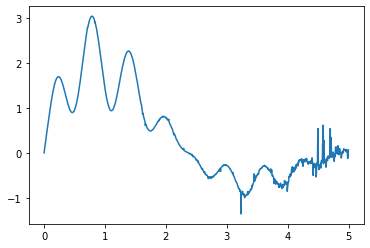

In [ ]:
from scipy.integrate import quad
from math import sin
import numpy as np
import matplotlib.pyplot as plt

def I(a):
    out, _ = quad(lambda x: (2+sin(10*a))*x**a*sin(a/(2-x)), 0, 2)
    return out

x = np.linspace(0,5,1000)
y = [I(a) for a in x]
plt.plot(x,y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys


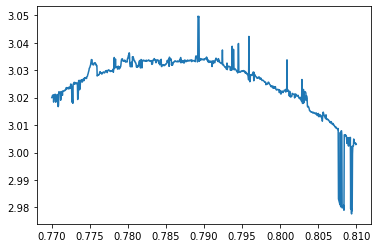

In [ ]:
x = np.linspace(0.77,0.81,1000)
y = [I(a) for a in x]
plt.plot(x,y)

From initial findings, we have that the maximum of the integral lies around $\alpha \approx 0.8$. Let's increase the precision to see if we can squeeze out any more digits.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


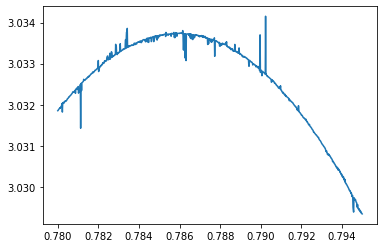

In [ ]:
def I(a):
    out, _ = quad(lambda x: (2+sin(10*a))*x**a*sin(a/(2-x)), 0, 2, epsabs=1e-10, epsrel=1e-10, limit=1000)
    return out

x = np.linspace(0.78,0.795,1000)
y = [I(a) for a in x]
plt.plot(x,y)


Let's just use out-of-the-box maximization routines that the `scipy` module provides and hope for the best.

In [ ]:
from scipy.optimize import minimize_scalar

def I(a):
    out, error = quad(lambda x: (2+sin(10*a))*x**a*sin(a/(2-x)), 0, 2, epsabs=1e-15, epsrel=1e-15, limit=100000)
    print("a: {}, out: {}, error: {}".format(a, out, error))
    return -out

minimize_scalar(I)

a: 0.0, out: 0.0, error: 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


a: 1.0, out: 1.420571105209236, error: 4.3390581392539303e-07
a: 2.6180339999999998, out: -0.4089767605948334, error: 5.525938027883686e-06
a: 1.0, out: 1.420571105209236, error: 4.3390581392539303e-07
a: 1.6180339748439998, out: 0.9018983894112175, error: 1.7086012417715246e-06
a: 0.618034, out: 1.8583038429462648, error: 6.638985368276078e-07
a: 0.381966025156, out: 1.1218929412872918, error: 5.926978650170873e-08


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (100000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


a: 0.7259940490005925, out: 2.847559096710934, error: 3.221585353607878e-07
a: 0.7937873103243327, out: 3.0304408205871365, error: 5.530032151925661e-07
a: 0.7965558509171422, out: 3.027683617582713, error: 7.398606835820749e-07
a: 0.7856586507978918, out: 3.0337285409546215, error: 2.830057315673332e-06
a: 0.7859969461444023, out: 3.0337323127620994, error: 8.0475110917709e-07
a: 0.7859322934665584, out: 3.033732562874438, error: 6.108409488996956e-07
a: 0.7859293754003323, out: 3.03373254042123, error: 5.094788207212695e-07
a: 0.7859533165673221, out: 3.0337325521441283, error: 3.872245670819178e-07
a: 0.7859403235762646, out: 3.033732738102549, error: 1.0062079143236419e-06
a: 0.7859426565358716, out: 3.0337329789716314, error: 1.2975360235236286e-06
a: 0.7859467283054447, out: 3.033732697058161, error: 1.2473415150113143e-06
a: 0.7859434069593711, out: 3.033732504896905, error: 3.7100975930703516e-07
a: 0.7859417654246224, out: 3.0337325701906934, error: 4.0276419078279555e-07
a: 0

     fun: -3.033733163355978
    nfev: 28
     nit: 24
 success: True
       x: 0.7859422948318388

With just standard libraries with no customization, we get 4 correct digits

# Attempt 2: Manipulating the Integral
We have that $$ I(\alpha) = \underbrace{(2+10\sin(\alpha))}_{:=f(\alpha)} \underbrace{\int_0^2 x^a \sin(\frac{\alpha}{2-x}) dx}_{:=I_1(\alpha)}$$

Note that by substituting $u = \frac{1}{2-x}, du = \frac{1}{u^2}$, we can rewrite $$I_1(\alpha) = \int_{1/2}^\infty \frac{(2-1/u)^\alpha}{u^2} \sin(\alpha u) du$$.

We use adaptive integration - i.e. we integrate between the zeros of the integrand until we achieve the desired error. Since these partial integrals form an alternating series, we can use the Shanks transform to accelerate convergence.

a: 0.025000000000000001388
a: 0.050000000000000002776
a: 0.075000000000000004163
a: 0.10000000000000000555
a: 0.12500000000000000694
a: 0.15000000000000000833
a: 0.17500000000000000971
a: 0.2000000000000000111
a: 0.22500000000000001249
a: 0.25000000000000001388
a: 0.27500000000000001527
a: 0.30000000000000001665
a: 0.32500000000000001804
a: 0.35000000000000001943
a: 0.37500000000000002082
a: 0.4000000000000000222
a: 0.42500000000000002359
a: 0.45000000000000002498
a: 0.47500000000000002637
a: 0.50000000000000002776
a: 0.52500000000000002914
a: 0.55000000000000003053
a: 0.57500000000000003192
a: 0.60000000000000003331
a: 0.62500000000000003469
a: 0.65000000000000003608
a: 0.67500000000000003747
a: 0.70000000000000003886
a: 0.72500000000000004025
a: 0.75000000000000004163
a: 0.77500000000000004302
a: 0.80000000000000004441
a: 0.8250000000000000458
a: 0.85000000000000004718
a: 0.87500000000000004857
a: 0.90000000000000004996
a: 0.92500000000000005135
a: 0.95000000000000005274
a: 0.9750000

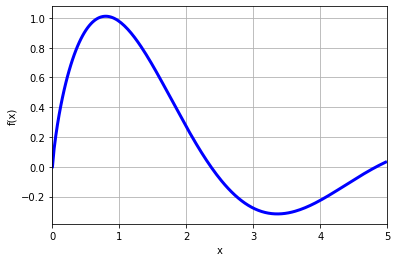

In [56]:
from mpmath import *

def integrand_f(a):
    return lambda u: (2-1/u)**a / (u*u) * sin(a*u)


def I(a, iterations = 1000):
    if a==0: return 0
    print("a: {}".format(a))
    integrand = integrand_f(a)
    partial_sums = []
    out = 0
    for i in range(iterations):
        lower_bound = 0.5 if i == 0 else i*pi/a
        upper_bound = (i+1)*pi/a
        int_temp = quad(integrand, [lower_bound, upper_bound], error=True)
        #print(i, lower_bound, upper_bound, int_temp)
        out += int_temp[0]
        partial_sums.append(out)
    return shanks(partial_sums)[-1][-1]

plot(I, [0,5])

# Attempt 3: Analytically Solving the Integral

After a number of failed attempts (see below for ideas/code, they could still probably work and get all 10 digits and I'd be interested to see what people could come up with), we hope that there is an analytic solution. 

We have that $$ I(\alpha) = \underbrace{(2+10\sin(\alpha))}_{:=f(\alpha)} \underbrace{\int_0^2 x^a \sin(\frac{\alpha}{2-x}) dx}_{:=I_1(\alpha)}$$

Now, substituting $x \mapsto 2-x$ gives us that $I_1(\alpha) = \int_0^2 (2-x)^a \sin(a/x) $.

Using the `sympy` module (and specifically the `meijerint` module), we try to integrate directly:


In [9]:
from sympy import symbols
x,a = symbols("x alpha")
from sympy import meijerint
temp = meijerint.meijerint_definite((2-x)**a*sin(a/x), x, 0,2)
temp[0]

sqrt(pi)*alpha*meijerg(((), (alpha/2 + 1/2, alpha/2 + 1)), ((0, 0, 1/2), (-1/2,)), polar_lift(alpha)**2/16)*gamma(alpha + 1)/4

Note that we therefore have that

$$I(\alpha) = \frac{\sqrt{\pi} \alpha}{4} \left(10 \sin{\left (\alpha \right )} + 2\right) {G_{2, 4}^{3, 0}\left(\begin{matrix}  & \frac{\alpha}{2} + \frac{1}{2}, \frac{\alpha}{2} + 1 \\0, 0, \frac{1}{2} & - \frac{1}{2} \end{matrix} \middle| {\frac{\alpha^2}{16}} \right)} \Gamma{\left(\alpha + 1 \right)} $$

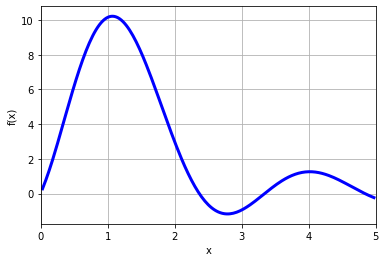

In [20]:
from mpmath import *
mp.dps = 100; mp.pretty = True
"""
def I(a):
    return meijerg([[],[0.5*(a+1), 0.5*(a+2)]], [[0,0,0.5],[-0.5]], a*a/16) * (2+10*sin(a))*gamma(a+1)*sqrt(pi)*a/4
"""
def I(a):
    return 4*sqrt(pi)*gamma(a)*(2+10*sin(a))*meijerg([[],[(a+3)/2, (a+4)/2]],[[1,1,1.5],[0.5]],a*a/16)
plot(I,[0,5])

# Failed Idea: Manipulating the Integral (No adaptive integration)

We have that $$ I(\alpha) = \underbrace{(2+10\sin(\alpha))}_{:=f(\alpha)} \underbrace{\int_0^2 x^a \sin(\frac{\alpha}{2-x}) dx}_{:=I_1(\alpha)}$$

Note that by substituting $u = \frac{1}{2-x}, du = \frac{1}{u^2}$, we can rewrite $$I_1(\alpha) = \int_{1/2}^\infty \frac{(2-1/u)^\alpha}{u^2} \sin(\alpha u) du$$.

In [38]:
from scipy.integrate import quad
from scipy.optimize import minimize
from math import sin

def I(a):
    integral, error = quad(lambda u: (2-1/u)**a/(u**2) * sin(a*u), 0.5, inf)
    print(a, integral, error)
    return -integral

minimize(I, 0, method = "Nelder-Mead")



[0.] 0.0 0.0
[0.00025] 0.002352826620544646 2.4130461625691477e-07
[0.0005] 0.004359569545032594 4.833316257658177e-07
[0.00075] 0.006235601352500905 2.1294935137416673e-06
[0.00125] 0.00976371347245973 6.913356852874392e-07
[0.00175] 0.013073921912886942 6.617877628816559e-06
[0.00275] 0.019316454363336802 8.672425229030306e-06
[0.00375] 0.025173299435622597 1.2839053031640355e-05
[0.00575] 0.036164761886298816 2.1476238708342978e-05
[0.00775] 0.046460850689221456 1.6235630951905167e-05
[0.01175] 0.0656342724729377 4.6010069149170116e-05
[0.01575] 0.08345184670069873 6.64190928844142e-05
[0.02375] 0.11633190638059712 7.60578133593837e-05
[0.03175] 0.14656698459348397 0.00011875589057647846
[0.04775] 0.20156305196775304 0.00012532039487658797
[0.06375] 0.2511992738692252 0.00022769161829480617
[0.09575] 0.33914978439793114 0.00017266664434989476
[0.12775] 0.41698883000226844 0.0003344281476930777
[0.19175] 0.5478357844780222 0.00039511039372441825
[0.25575] 0.6566971750665089 0.0007251

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


[1.02375] 0.968162919839483 0.0013753461932899391
[0.89575] 1.0024599017663407 0.004157123248243208
[0.63975] 0.987077263791965 0.0021035371169317862
[0.83175] 1.0106889370794043 0.003941228717036616
[0.70375] 1.003087328336796 0.003391779824414049
[0.79975] 1.0116363380114701 0.003058071961529185
[0.83175] 1.0106889370794043 0.003941228717036616
[0.78375] 1.0113712824661603 0.004432330323465619
[0.81575] 1.0094906194588413 0.00428452658898304
[0.79175] 1.010559322849502 0.000709091432433695
[0.79175] 1.010559322849502 0.000709091432433695
[0.80775] 1.011494074033817 0.0012054293637504543
[0.80375] 1.0108743309076118 0.0041734030175949195
[0.79575] 1.0109007640517695 0.003984644154506175
[0.80375] 1.0108743309076118 0.0041734030175949195
[0.79775] 1.0122367780672814 0.0009966150631925963
[0.79575] 1.0109007640517695 0.003984644154506175
[0.79875] 1.012290388423813 0.00170410342931393
[0.79975] 1.0116363380114701 0.003058071961529185
[0.79825] 1.0124166592731374 0.00029413833690949964
[

 final_simplex: (array([[0.79825  ],
       [0.7983125]]), array([-1.01241666, -1.01239111]))
           fun: -1.0124166592731374
       message: 'Optimization terminated successfully.'
          nfev: 51
           nit: 24
        status: 0
       success: True
             x: array([0.79825])

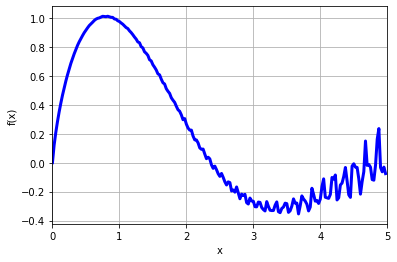

In [2]:
from mpmath import *
mp.dps = 20; mp.pretty = True
def I(a):
    return quad(lambda u: (2-1/u)**a/(u**2) * sin(a*u), [1/2, inf])
plot(I, [0,5])

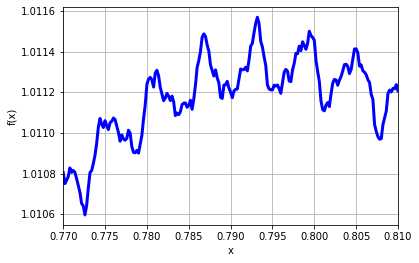

In [31]:
mp.dps = 150
plot(I, [0.77,0.81])

In [53]:
mp.dps = 30

def I_error(a):
    return quad(lambda u: (2-1/u)**a/(u**2) * sin(a*u), [1/2, inf], method='gauss-legendre', error=True)

import numpy as np

x = np.linspace(0.77,0.81,10)
[I_error(i) for i in x]

[(1.01357284643710459933883521102, 0.1),
 (1.00953868071860301525267145754, 0.0000001),
 (1.01052399130619093890513199516, 0.01),
 (1.00379093105126199017596598635, 0.1),
 (1.00228574461499272454611471508, 0.1),
 (0.997700092566873695213777646886, 0.1),
 (0.994818920496581918863546219604, 1.0),
 (0.996551760969276836425049270829, 0.1),
 (1.00645793214318760990416795634, 0.1),
 (1.01016205816473802369776526273, 0.01)]

# Failed Idea: Differentiation Under the Integral
We use [Feynman's trick](https://en.wikipedia.org/wiki/Leibniz_integral_rule) to get an expression for $I'(\alpha)$ in an appropriate domain and then solve the equation $I'(\alpha)=0$ to get the appropriate value of $\alpha$.

We have that $$ I(\alpha) = \underbrace{(2+10\sin(\alpha))}_{:=f(\alpha)} \underbrace{\int_0^2 x^a \sin(\frac{\alpha}{2-x}) dx}_{:=I_1(\alpha)}$$
and therefore, we have that $$ \frac{\partial{I}}{\partial{\alpha}} = f(\alpha) \cdot I_2(\alpha) + g(\alpha) \cdot I_1(\alpha) $$

where $g(\alpha) = f'(\alpha) = 10 \cos(\alpha) $ and
$$ I_2(\alpha) = I_1'(\alpha) = \frac{\partial}{\partial{\alpha}} \int_0^2 x^a \sin(\frac{\alpha}{2-x}) dx = \int_0^2 \left( \frac{\partial}{\partial{\alpha}} (x^a \sin(\frac{\alpha}{2-x})) dx \right) \\= \underbrace{\int_0^2 \frac{x^a \cos{(\frac{\alpha}{2-x}})}{2-x}dx}_{:=I_3(\alpha)} + \underbrace{\int_0^2 x^a \log(x) \sin(\frac{\alpha}{2-x}) dx}_{:=I_4(\alpha)}$$

To calculate $I_3$ and $I_4$, we use Romberg integration in order to deal with their highly oscillatory nature.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.849296e-03
  AccuracyWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.745233e+04
  AccuracyWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.802071e-03
  AccuracyWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.045881e-03
  AccuracyWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest difference = 9.498470e+04
  AccuracyWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest diff

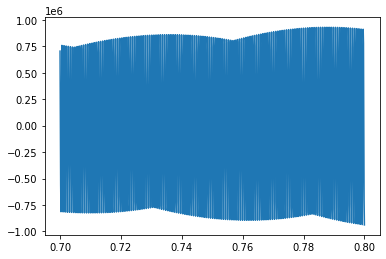

In [ ]:
from math import cos, sin, log
from scipy.integrate import romberg

I_1_integrand = lambda x,a: x**a*sin(a/(2-x))
I_3_integrand = lambda x,a: (x**a * cos(a/(2-x)))/(2-x)
I_4_integrand = lambda x,a: x**a * log(x) * sin(a/(2-x))
f = lambda a: 2+10*sin(a)
g = lambda a: 10*cos(a)
"""
def I_3_integrand(x,a):
    try:
        return (x**a * cos(a/(2-x)))/(2-x)
    except:
        return float('inf')

def I_4_integrand(x,a):
    try:
        return x**a * log(x) * sin(a/(2-x))
    except:
        return float('inf')
"""

def I_prime(a,eps=1e-8):
    I_3 = romberg(lambda x: I_3_integrand(x,a), 0+eps,2-eps, tol=1e-12, rtol=1e-12)
    I_4 = romberg(lambda x: I_4_integrand(x,a), 0+eps,2-eps, tol=1e-12, rtol=1e-12)
    I_1 = romberg(lambda x: I_1_integrand(x,a), 0+eps,2-eps, tol=1e-12, rtol=1e-12)
    I_2 = I_3 + I_4
    return f(a)*I_2 + g(a)*I_1

import matplotlib.pyplot as plt

y = [I_prime(x) for x in np.linspace(0.7,0.8,1000)]
plt.plot(np.linspace(0.7,0.8,1000), y)


Unfortunately, we still have a lot of noise in our evaluations of  $I'(\alpha)$.

# Failed Idea: Using a Contour Integral
We use a semicircular contour starting at $z=0$ ending at $z=2$ in the complex plane parametrized by $\gamma(t) = 1- e^{it} $. Note that we therefore have that that $I_1(\alpha)$ is given by $\int_0^\pi \Im((1-e^{it})^\alpha e^{i\alpha/(1+e^{it})} \cdot -i e^{it} ) dt = \int_0^\pi \Re((1-e^{it})^\alpha \cdot -e^{ia/(1+e^{it})+it})dt $



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


(0.9543777534415185, 2.5582045450542832e+82)

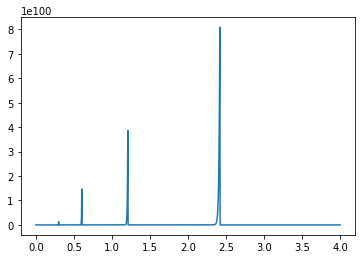

In [ ]:
from cmath import sin,exp,pi
from scipy.integrate import quad, romberg
i = 1j
Re = lambda z: z.real

def integrand(t,a):
    try:
        return Re((1-exp(i*t))**a * -exp(i*t + i*a/(1+exp(i*t))))
    except:
        return 0

def I(a,eps = 1e-16):
    out, _ = quad(lambda t: integrand(t,a), 0, pi)
    return out

def I_test(a):
    out, _ = quad(lambda x: Re((2+sin(10*a))*x**a*sin(a/(2-x))), 0, 2)
    return out

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4,1000)
y = [I(t) for t in x]
plt.plot(x,y)

I_test(0.5), I(0.5)

### NOTE: FAILED

(Left here for completeness)

We use [Feynman's trick](https://en.wikipedia.org/wiki/Leibniz_integral_rule) to get an expression for $I'(\alpha)$ in an appropriate domain and then solve the equation $I'(\alpha)=0$ to get the appropriate value of $\alpha$.

We have:

$$\frac{\partial{I}}{\partial{a}} = \frac{\partial}{\partial{\alpha}} \left(\int_0^2 (2 + \sin(10\alpha)) \; x^\alpha \sin(\frac{\alpha}{2-x}) dx \right) \\ = \frac{\partial}{\partial{\alpha}} \left( ( 2 + 10 \sin \alpha ) \cdot \int_0^2 x^\alpha \sin(\frac{\alpha}{2-x}) dx \right) \\= (2+10\sin(\alpha))\cdot \int_0^2 \partial_\alpha (x^a \sin(\frac{\alpha}{2-x}))dx  + 10\cos(\alpha) \int_0^2 x^\alpha \sin(\frac{\alpha}{2-x}) dx \\= (2+10\sin(\alpha))\cdot \int_0^2 \partial_\alpha (x^a \sin(\frac{\alpha}{2-x}))dx  + 10\cos(\alpha) \int_0^2 x^\alpha \sin(\frac{\alpha}{2-x}) dx $$ 


In [ ]:
import sympy
from sympy import sin
from sympy.utilities.lambdify import lambdastr
sympy.init_printing()
x,a = sympy.symbols("x alpha")
integrand = (2 + sin(10*a))*x**a*sin(a/(2-x))

lambdastr((x,a), sympy.diff(integrand, a)).replace("alpha", "a")

'lambda x,a: (x**a*(sin(10*a) + 2)*log(x)*sin(a/(-x + 2)) + 10*x**a*sin(a/(-x + 2))*cos(10*a) + x**a*(sin(10*a) + 2)*cos(a/(-x + 2))/(-x + 2))'

In [ ]:
from mpmath import log, sin, cos, quad
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def I_prime(a):
    try:
        out, _ = quad(lambda x: (x**a*(sin(10*a) + 2)*log(x)*sin(a/(-x + 2)) + 10*x**a*sin(a/(-x + 2))*cos(10*a) + x**a*(sin(10*a) + 2)*cos(a/(-x + 2))/(-x + 2)), 0,2)
        return out
    except:
        return -1

x = np.linspace(0.77,0.81,1000)
y = [I_prime(a) for a in x]
plt.plot(x,y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
